Data preprocessing and Feature Selection

Data transformation

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
datasets = pd.read_csv('/content/sample_data/Data_for_Transformation.csv')
print(datasets)

    Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No


In [6]:
x = datasets.iloc[:,:-1].values # Getting only the features
print(x)

y = datasets.iloc[:,-1:].values
print(y)

x_new = datasets.iloc[:,1:3].values
print(x_new)

[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]
[['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']]
[[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 68000]
 [   35 58000]
 [   39 52000]
 [   48 79000]
 [   50 83000]
 [   37 67000]
 [   45 55000]]


In [7]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)
print(x_scaled)

[[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.57142857]
 [0.34782609 0.28571429]
 [0.52173913 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]
 [0.7826087  0.2       ]]


In [8]:
std = StandardScaler()
x_std = std.fit_transform(x_new)
print(x_std)

[[ 0.68188156  0.79548755]
 [-1.81835082 -1.41513049]
 [-1.37713334 -0.86247598]
 [-0.2005534  -0.21771238]
 [ 0.09359159  0.42705121]
 [-0.64177088 -0.49403964]
 [-0.05348091 -1.04669415]
 [ 1.27017153  1.44025115]
 [ 1.56431652  1.80868749]
 [-0.34762589  0.33494213]
 [ 0.82895405 -0.77036689]]


Steps for handling categorical data

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
datasets = pd.read_csv('/content/sample_data/Data_for_Categorical_Values.csv')
print(datasets.describe())

             Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


In [11]:
x = datasets.iloc[:, :-1].values
print(x)

y = datasets.iloc[:, -1].values
print(y)

[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [12]:
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
print(x)

[[0 44 72000]
 [2 27 48000]
 [1 30 54000]
 [2 38 61000]
 [1 40 68000]
 [0 35 58000]
 [2 39 52000]
 [0 48 79000]
 [1 50 83000]
 [0 37 67000]
 [2 45 55000]]


In [13]:
dummy = pd.get_dummies(datasets['Country'])
print(dummy)
datasets = datasets.drop(['Country', 'Purchased'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print(datasets)

    France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
4        0        1      0
5        1        0      0
6        0        0      1
7        1        0      0
8        0        1      0
9        1        0      0
10       0        0      1
    France  Germany  Spain  Age  Salary
0        1        0      0   44   72000
1        0        0      1   27   48000
2        0        1      0   30   54000
3        0        0      1   38   61000
4        0        1      0   40   68000
5        1        0      0   35   58000
6        0        0      1   39   52000
7        1        0      0   48   79000
8        0        1      0   50   83000
9        1        0      0   37   67000
10       0        0      1   45   55000


In [16]:
onehotencoder = OneHotEncoder()

x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()
print(x)

dfOneHot = pd.DataFrame(x,columns=["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)]
)
df = pd.concat([datasets,dfOneHot],axis=1)
df = df.drop(['Country'],axis=1)
print(df.head())

AttributeError: ignored

Steps for handling the missing value

In [17]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

datasets = pd.read_csv('/content/sample_data/Data_for_Missing_Values.csv')
print(datasets)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [18]:
x = datasets.iloc[:,:-1].values
y = datasets.iloc[:,-1].values
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]
['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [19]:
datasets.dropna(axis=0,how='all',inplace=True)
print(datasets)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [20]:
updated_df = datasets
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,Germany,40.0,62900.0,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes


In [23]:
new_x = datasets.iloc[:,:-1].values
new_y = datasets.iloc[:,-1].values

Using simple imputer

In [25]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

datasets = pd.read_csv('/content/sample_data/Data_for_Missing_Values.csv')
print(datasets)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [26]:
x = datasets.iloc[:,:-1].values
y = datasets.iloc[:,-1].values

In [27]:
datasets.dropna(axis=0,how='all',inplace=True)
print(datasets)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [28]:
new_x = datasets.iloc[:,:-1].values
new_y = datasets.iloc[:,-1].values

updated_df['Age'].fillna(updated_df['Age'].mean())

0     44.0
1     27.0
2     30.0
3     38.0
5     40.0
6     35.0
7     39.4
8     48.0
9     50.0
10    37.0
11    45.0
Name: Age, dtype: float64

In [29]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(new_x[:,1:3])
new_x[:,1:3] = imputer.transform(new_x[:,1:3])
print(new_x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 62900.0]
 ['France' 35.0 58000.0]
 ['Spain' 39.4 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
data = pd.read_csv('/content/sample_data/Data_for_Correlation.csv')
data.head()

,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


In [33]:
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,-2
1,2,4,5,-4
2,3,9,6,3
3,4,16,7,4
4,5,25,8,25


In [34]:
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


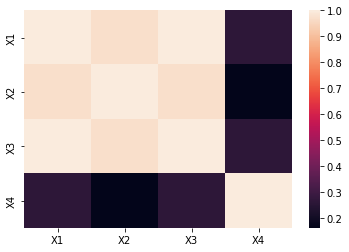

In [35]:
sns.heatmap(corr)

In [36]:
print(corr.shape[0])
columns = np.full((corr.shape[0],),True,dtype=bool)
print(corr.iloc[:,:])
for i in range(corr.shape[0]):
  for j in range(i+1,corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

print(columns)

4
          X1        X2        X3        X4
X1  1.000000  0.972714  1.000000  0.263266
X2  0.972714  1.000000  0.972714  0.163575
X3  1.000000  0.972714  1.000000  0.263266
X4  0.263266  0.163575  0.263266  1.000000
[ True False False  True]


In [37]:
selected_columns = data.columns[columns]
print(data.columns)
print(selected_columns)
selected_columns.shape

Index(['X1', 'X2', 'X3', 'X4'], dtype='object')
Index(['X1', 'X4'], dtype='object')


(2,)

In [38]:
data = data[selected_columns]
print(data)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


Exercise

Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv"

In [40]:
import numpy as np
import pandas as pd

# Identifying the null values

missing_values = ["??", "????", None, "NaN", np.nan]

df = pd.read_csv("/content/sample_data/Exercise-CarData.csv",na_values=missing_values)

cnt = 0
for val in df['Price']:
  if type(val)!=type(3):
    df.loc[cnt, 'Price']=np.nan
  else:
    df.loc[cnt, 'Price'] = int(val)
  cnt+=1

cnt = 0
for val in df['Age']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Age']=np.nan
    else:
      df.loc[cnt, 'Age'] = int(val)
  except ValueError:
    df.loc[cnt, 'Age']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['KM']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'KM']=np.nan
    else:
      df.loc[cnt, 'KM'] = int(val)
  except ValueError:
    df.loc[cnt, 'KM']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['FuelType']:
  try:
      int(val)
      df.loc[cnt, 'FuelType']=np.nan
  except ValueError:
      pass
  cnt+=1

cnt = 0
for val in df['HP']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'HP']=np.nan
    else:
      df.loc[cnt, 'HP'] = int(val)
  except ValueError:
    df.loc[cnt, 'HP']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['MetColor']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'MetColor']=np.nan
    else:
      df.loc[cnt, 'MetColor'] = int(val)
  except ValueError:
    df.loc[cnt, 'MetColor']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Automatic']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Automatic']=np.nan
    else:
      df.loc[cnt, 'Automatic'] = int(val)
  except ValueError:
    df.loc[cnt, 'Automatic']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['CC']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'CC']=np.nan
    else:
      df.loc[cnt, 'CC'] = int(val)
  except ValueError:
    df.loc[cnt, 'CC']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Doors']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Doors']=np.nan
    else:
      df.loc[cnt, 'Doors'] = int(val)
  except ValueError:
    df.loc[cnt, 'Doors']=np.nan
    pass
  cnt+=1

cnt = 0
for val in df['Weight']:
  try:
    if type(int(val))!=type(3):
      df.loc[cnt, 'Weight']=np.nan
    else:
      df.loc[cnt, 'Weight'] = int(val)
  except ValueError:
    df.loc[cnt, 'Weight']=np.nan
    pass
  cnt+=1

print(df.isnull().sum())
print("Total dirty values: ",df.isnull().sum().sum())

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           3
Weight          0
dtype: int64
Total dirty values:  374


In [41]:
# Removing the null values where the complete row in empty
datasets = df
x = datasets.iloc[:,1:].values

In [42]:
from sklearn.preprocessing import OneHotEncoder

print(datasets.head())
# Dropping all the rows having any NaN values
datasets.dropna(axis=0, how='any', inplace=True)
print(datasets.head())

   Unnamed: 0  Price   Age       KM FuelType    HP  MetColor  Automatic    CC  \
0           0  13500  23.0  46986.0   Diesel  90.0       1.0          0  2000   
1           1  13750  23.0  72937.0   Diesel  90.0       1.0          0  2000   
2           2  13950  24.0  41711.0   Diesel  90.0       NaN          0  2000   
3           3  14950  26.0  48000.0   Diesel  90.0       0.0          0  2000   
4           4  13750  30.0  38500.0   Diesel  90.0       0.0          0  2000   

  Doors  Weight  
0   NaN    1165  
1     3    1165  
2     3    1165  
3     3    1165  
4     3    1170  
   Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
1           1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
3           3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4           4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
5           5  12950  32.0  61000.0   Diesel   90.0       0.0          0   
8           8  21500  27.

In [43]:
# One hot for Fuel type

dummy = pd.get_dummies(datasets['FuelType'])
datasets = datasets.drop(['FuelType'],axis=1)
datasets = datasets.drop(['Unnamed: 0'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print(datasets)

      CNG  Diesel  Petrol  Price   Age       KM     HP  MetColor  Automatic  \
1       0       1       0  13750  23.0  72937.0   90.0       1.0          0   
3       0       1       0  14950  26.0  48000.0   90.0       0.0          0   
4       0       1       0  13750  30.0  38500.0   90.0       0.0          0   
5       0       1       0  12950  32.0  61000.0   90.0       0.0          0   
8       0       0       1  21500  27.0  19700.0  192.0       0.0          0   
...   ...     ...     ...    ...   ...      ...    ...       ...        ...   
1423    0       0       1   7950  80.0  35821.0   86.0       0.0          1   
1424    0       0       1   7750  73.0  34717.0   86.0       0.0          0   
1429    0       0       1   8950  78.0  24000.0   86.0       1.0          1   
1430    0       0       1   8450  80.0  23000.0   86.0       0.0          0   
1435    0       0       1   6950  76.0      1.0  110.0       0.0          0   

        CC Doors  Weight  
1     2000     3    1165

In [44]:
# Performing standardization on data
updated_df = datasets

for col in updated_df:
  updated_df[col] = updated_df[col].fillna(updated_df[col].mean())

print(updated_df)

      CNG  Diesel  Petrol  Price   Age       KM     HP  MetColor  Automatic  \
1       0       1       0  13750  23.0  72937.0   90.0       1.0          0   
3       0       1       0  14950  26.0  48000.0   90.0       0.0          0   
4       0       1       0  13750  30.0  38500.0   90.0       0.0          0   
5       0       1       0  12950  32.0  61000.0   90.0       0.0          0   
8       0       0       1  21500  27.0  19700.0  192.0       0.0          0   
...   ...     ...     ...    ...   ...      ...    ...       ...        ...   
1423    0       0       1   7950  80.0  35821.0   86.0       0.0          1   
1424    0       0       1   7750  73.0  34717.0   86.0       0.0          0   
1429    0       0       1   8950  78.0  24000.0   86.0       1.0          1   
1430    0       0       1   8450  80.0  23000.0   86.0       0.0          0   
1435    0       0       1   6950  76.0      1.0  110.0       0.0          0   

        CC  Doors  Weight  
1     2000      3    11

   CNG  Diesel  Petrol  Price   Age       KM     HP  MetColor  Automatic  \
1    0       1       0  13750  23.0  72937.0   90.0       1.0          0   
3    0       1       0  14950  26.0  48000.0   90.0       0.0          0   
4    0       1       0  13750  30.0  38500.0   90.0       0.0          0   
5    0       1       0  12950  32.0  61000.0   90.0       0.0          0   
8    0       0       1  21500  27.0  19700.0  192.0       0.0          0   

     CC  Doors  Weight  
1  2000      3    1165  
3  2000      3    1165  
4  2000      3    1170  
5  2000      3    1170  
8  1800      3    1185  
             CNG    Diesel    Petrol     Price       Age        KM        HP  \
CNG     1.000000 -0.036129 -0.290579 -0.051476  0.011334  0.161206  0.057429   
Diesel -0.036129  1.000000 -0.945728 -0.018608 -0.049370  0.444327 -0.540526   
Petrol -0.290579 -0.945728  1.000000  0.034555  0.043585 -0.477852  0.498866   
Price  -0.051476 -0.018608  0.034555  1.000000 -0.877351 -0.600234  0.334

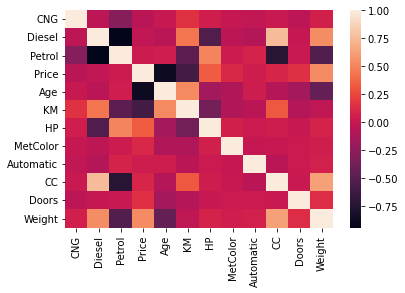

In [45]:
# Finding and removing correlation

data = updated_df
print(data.head())
count = 0
for val in data['Doors']:
  data.at[count, 'Doors'] = int(val)
  count+=1

corr = data.corr()
print(corr.head())

sns.heatmap(corr)

In [46]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

selected_columns = data.columns[columns]
data = data[selected_columns]